In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Undesired warning messages are blocked
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather_classification_data.csv')

# Understanding the Data

In [3]:
df.head(2)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy


In [4]:
rows = df.columns

for i in rows:
  print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0


There is not any null value in our data set that we have to evaluate

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


# Graphs

In [6]:
df.head(3)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny


**1) Temperature**

I will use this temperature classification in a few graphs.

In [7]:
temp_type = []

low_temp = 0  # < 15
middle_temp = 0 # 15 - 35
high_temp = 0 # > 35

for i in df['Temperature']:
  if i < 15:
    low_temp += 1
    temp_type.append('Low')
  elif i >= 15 and i < 35:
    middle_temp += 1
    temp_type.append('Middle')
  else:
    high_temp += 1
    temp_type.append('High')

df['Temperature Type'] = temp_type
print(f'high: {high_temp}, middle: {middle_temp}, low: {low_temp}')



high: 1918, middle: 6514, low: 4768


([<matplotlib.patches.Wedge at 0x78064cc47430>,
 [Text(0.4645636622260811, 0.9970860563357066, '< 15'),
  Text(-0.8565056213572605, -0.6902159956009519, '15 - 35'),
  Text(0.987369234742671, -0.4848731734007072, '> 35')],
 [Text(0.253398361214226, 0.5438651216376581, '36.12%'),
  Text(-0.4671848843766875, -0.3764814521459738, '49.35%'),
  Text(0.5385650371323659, -0.2644762764003857, '14.53%')])

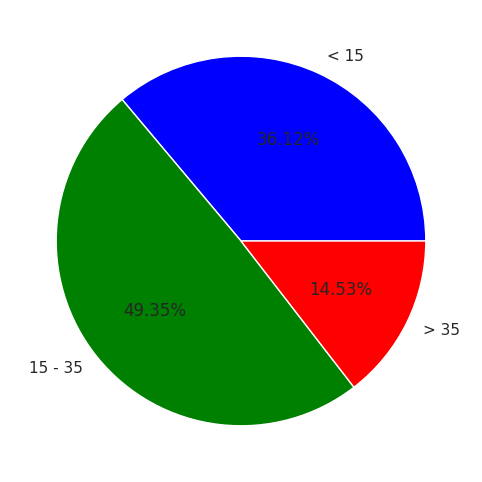

In [67]:
plt.figure(figsize = (10, 6))
labels = ['< 15', '15 - 35', '> 35']
values = [low_temp, middle_temp, high_temp]
colors = ['blue', 'green', 'red']
plt.pie(values, labels = labels, autopct = '%1.2f%%', colors = colors)

It is the distribution of temperatures due to classification above.

<Axes: xlabel='Season', ylabel='Temperature'>

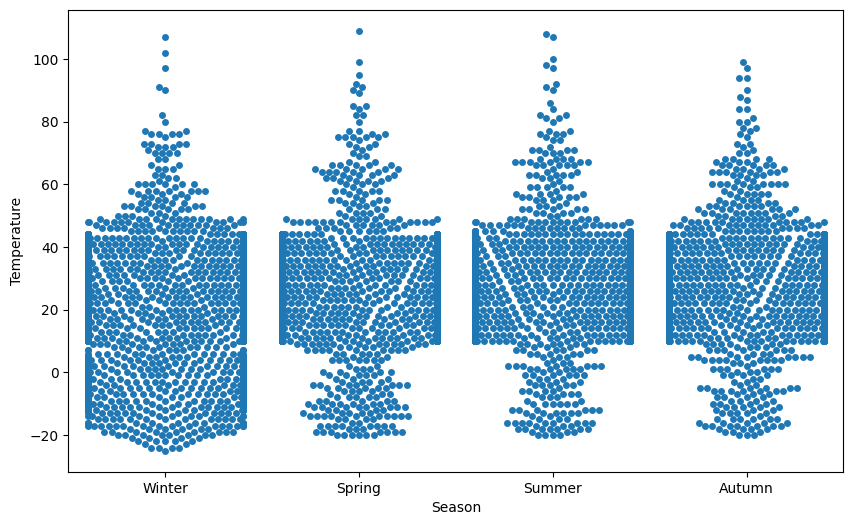

In [9]:
plt.figure(figsize = (10, 6))
sns.swarmplot(data = df, x = 'Season', y = 'Temperature')

<Axes: xlabel='Humidity', ylabel='Temperature'>

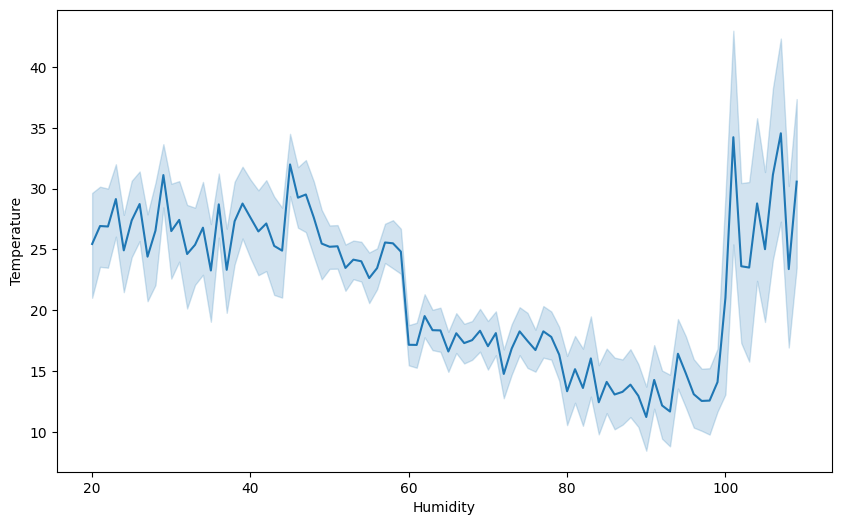

In [10]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Humidity', y = 'Temperature')

<Figure size 1000x600 with 0 Axes>

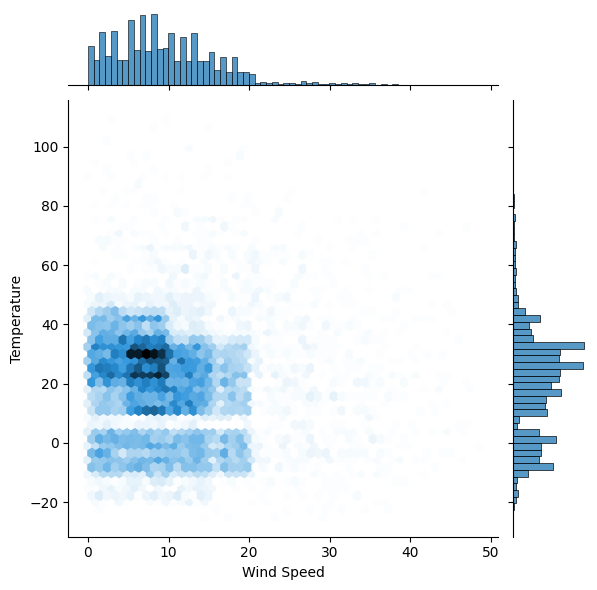

In [11]:
plt.figure(figsize = (10, 6))
sns.jointplot(data = df, x = 'Wind Speed', y = 'Temperature', kind ='hex')

<Axes: xlabel='Atmospheric Pressure', ylabel='Temperature'>

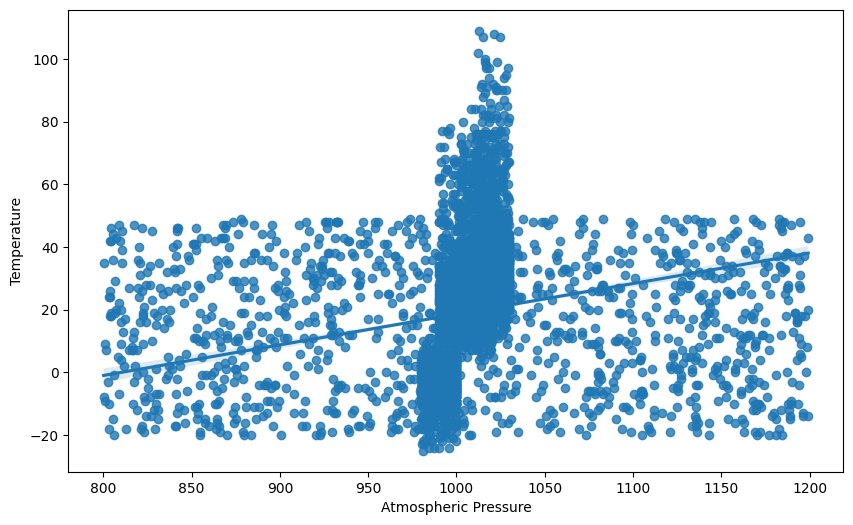

In [12]:
plt.figure(figsize = (10, 6))
sns.regplot(data = df, x = 'Atmospheric Pressure', y = 'Temperature')

In general, an interval of atmospheric pressure is observed. However when we evaluate low or high atmospheric pressure and temperatures, it is clear to say that there is a linear proportion between atm and temperature

<Axes: xlabel='UV Index', ylabel='Temperature'>

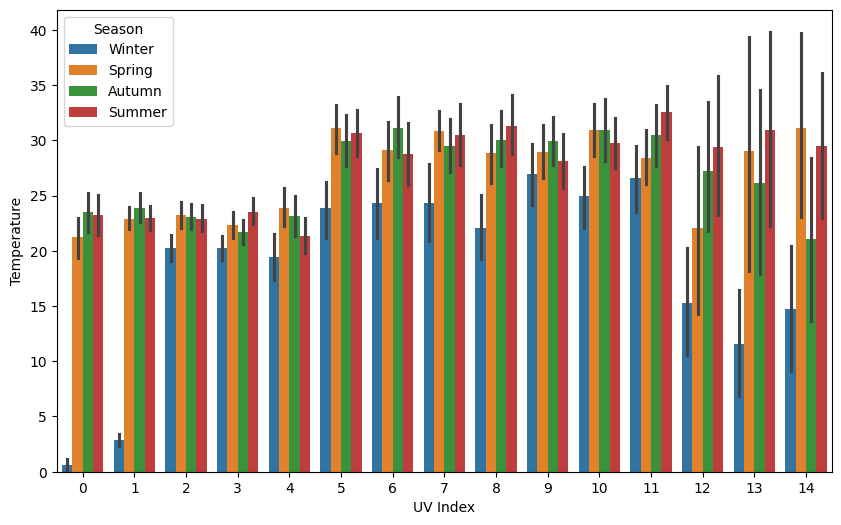

In [13]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'UV Index', y = 'Temperature', hue = 'Season')

We can say that in general, UV index is high when temperature increases.

**2) Wind Speed**

<Axes: xlabel='Wind Speed', ylabel='Density'>

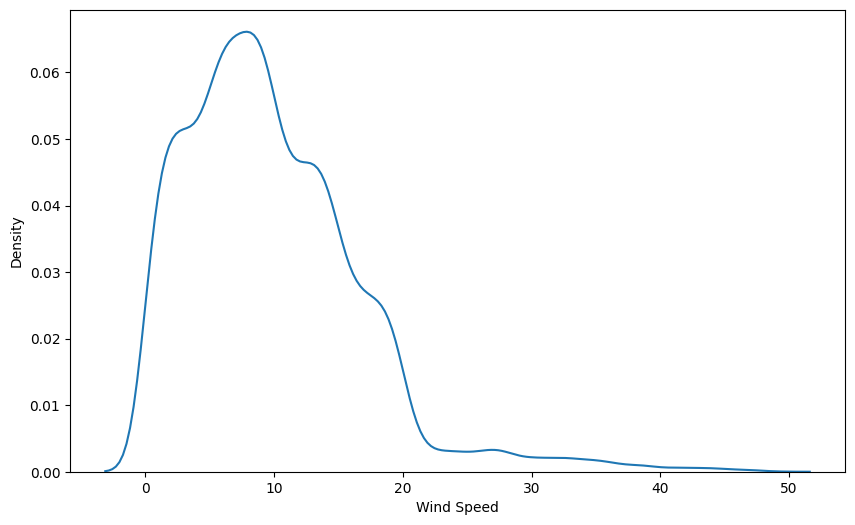

In [14]:
plt.figure(figsize = (10, 6))
sns.kdeplot(df['Wind Speed'])

Most of times, wind speed is around 9-10 km/h. Also according to that density graph it is clear that wind speed that faster than 25 km/h can be named as 'outlier'.

<Axes: xlabel='Humidity', ylabel='Wind Speed'>

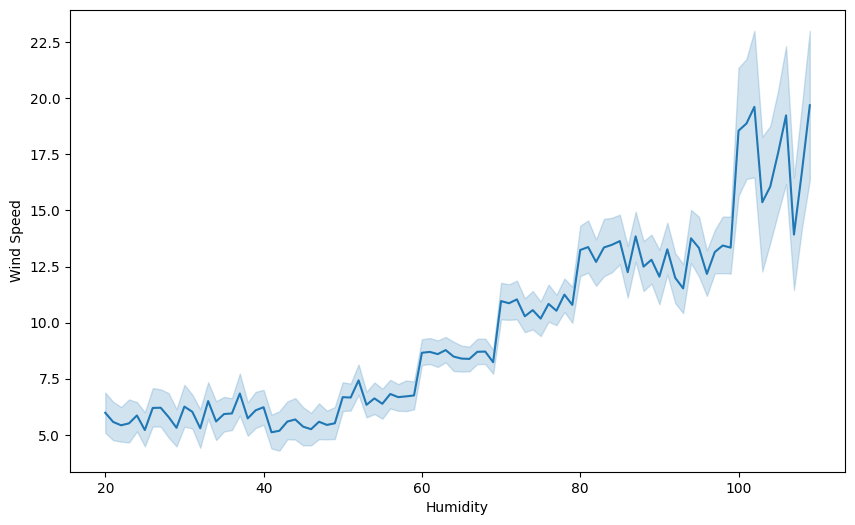

In [15]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Humidity', y = 'Wind Speed')

According to graph, there is a linear proportion between humidity and wind speed

In [16]:
print(df['Temperature'].mean())
print(df['Temperature'].max())
print(df['Temperature'].min())

19.12757575757576
109.0
-25.0


In [17]:
np.percentile(df['Temperature'], 50)

21.0

<Axes: xlabel='Temperature Type', ylabel='Wind Speed'>

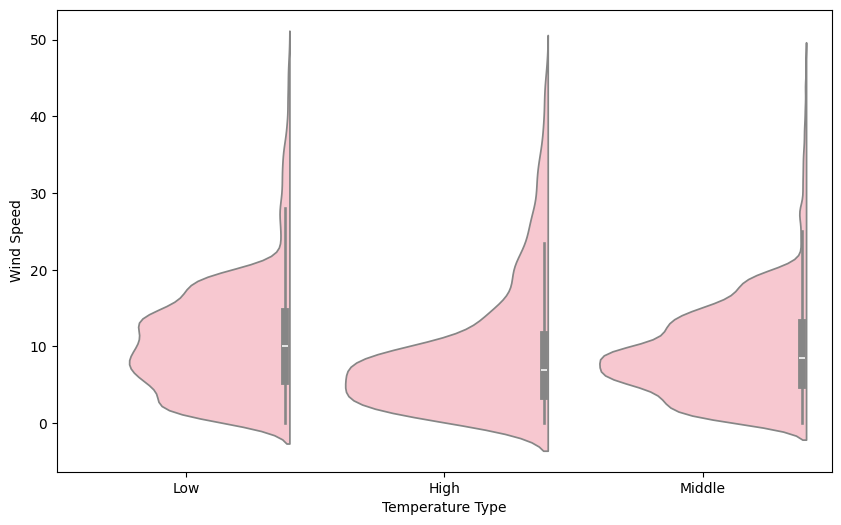

In [18]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df, x = 'Temperature Type', y = 'Wind Speed', split = True, color = 'pink')

According to that graph, average and maximum wind speed is the highest in the low temperature type. Also due to our density function above, this graph corrects that average wind speed is around 10 km/h

<Axes: xlabel='Season', ylabel='Wind Speed'>

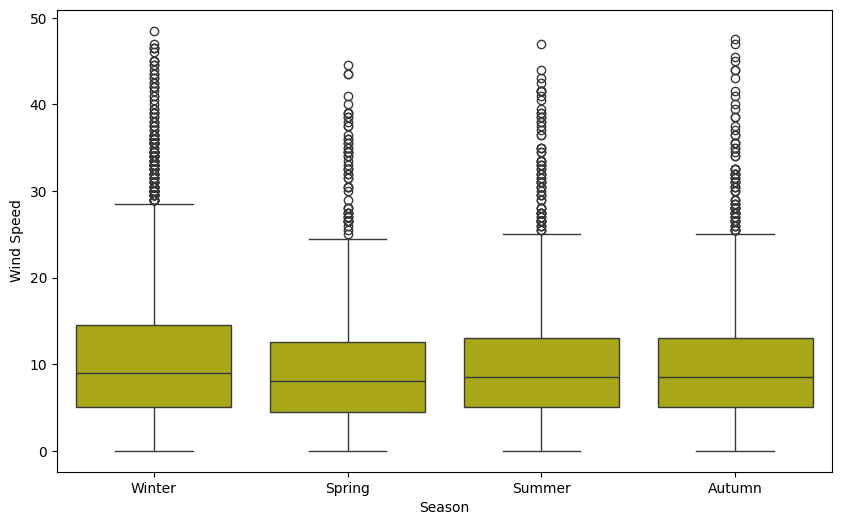

In [19]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Season', y = 'Wind Speed', color = 'y')

Wind speed is almost similar in every season. However avearage and maximum values are higher in winter season. Moreover, outliers seem more clear in winter.

**3) Humidity**

<Axes: xlabel='Precipitation (%)', ylabel='Humidity'>

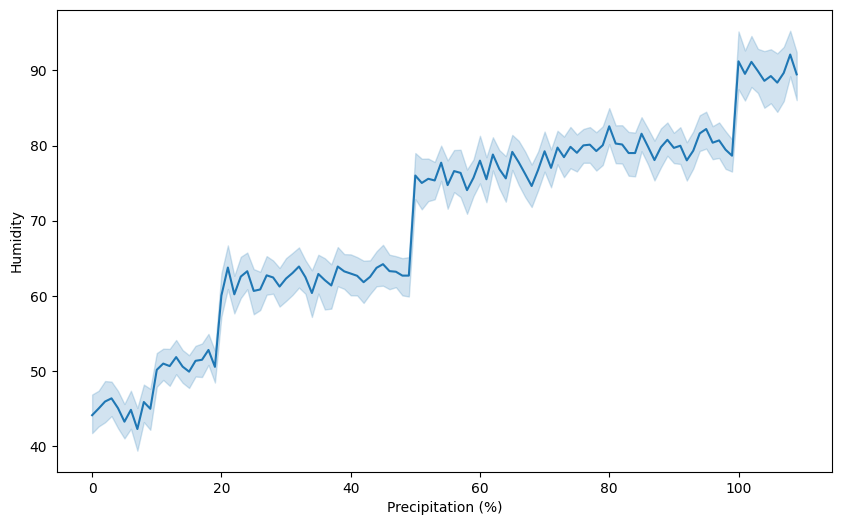

In [20]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Precipitation (%)', y = 'Humidity')

Precipitation(rain, snow etc.) requires humid according to graph. Thus there is a linear proportion between humidity and precipitation

<Axes: xlabel='Weather Type', ylabel='Humidity'>

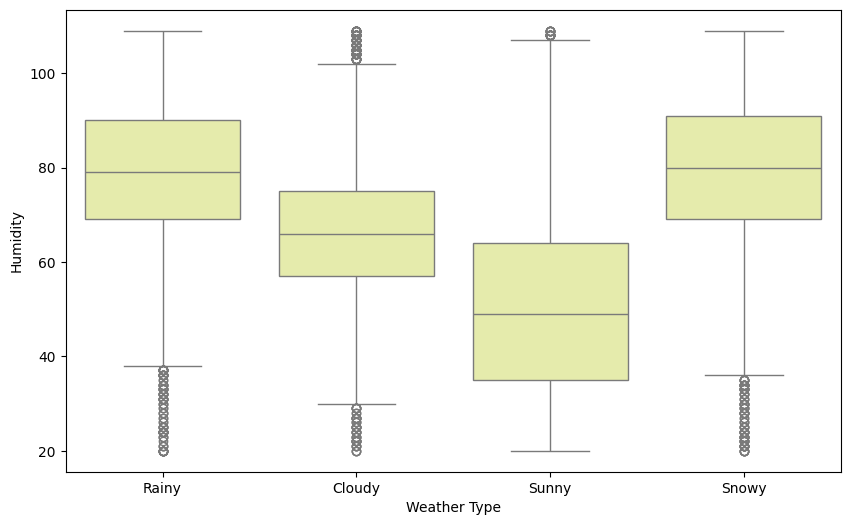

In [21]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Weather Type', y = 'Humidity', color = '#EDF5A2')

Precipitaton requires humid. Consequently higher humidity can be expected when precipitation exist.

<Axes: xlabel='Humidity', ylabel='Location'>

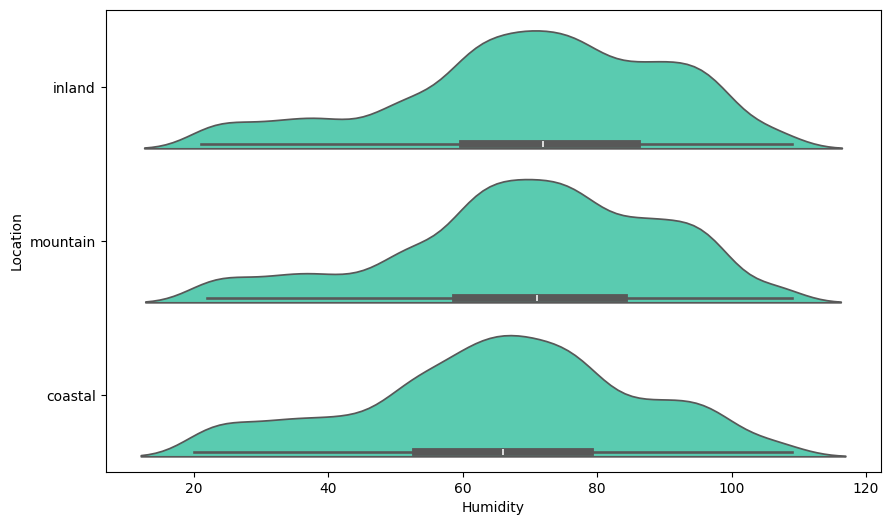

In [22]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df, x = 'Humidity', y = 'Location', split = True, color = '#47DEBA')

Humidity is almost similar in these regions.

**4) Precipitation**

<Axes: xlabel='Season', ylabel='Precipitation (%)'>

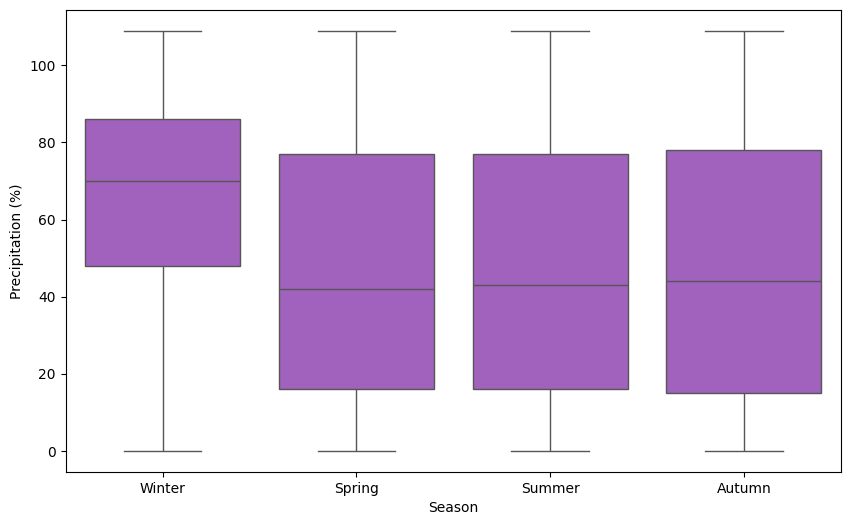

In [23]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Season', y = 'Precipitation (%)', color = '#A553CB')

Mostly, precipitation occurs in weather. For the other season, precipitation almost has the same behaviour.

<Axes: xlabel='Precipitation (%)', ylabel='Cloud Cover'>

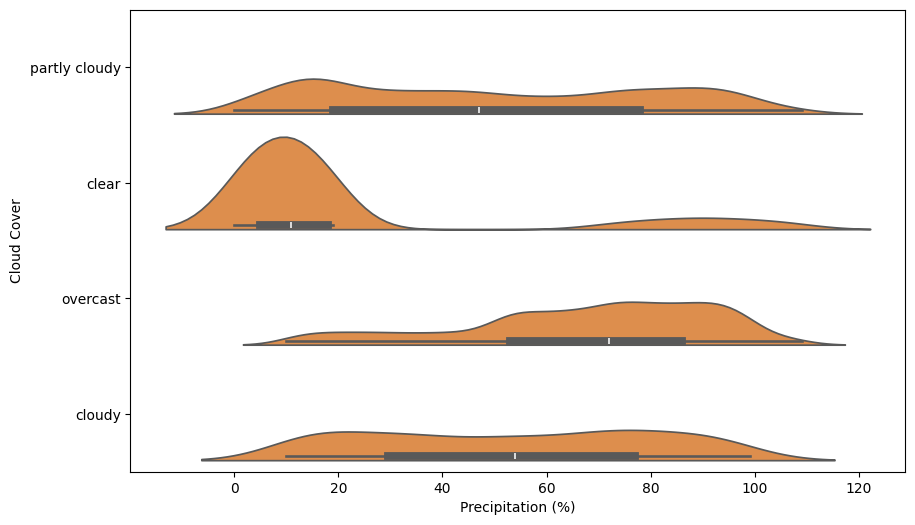

In [24]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df, x = 'Precipitation (%)', y = 'Cloud Cover', split = True, color = '#F58C35')

As expectation, if you do not see any cloud in sky you do not expect rain or snow :) Thus we can sligthly say that there is a proportion between cloud frequency and probability of precipitation

**5) Cloud Cover**

In [25]:
df['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [26]:
partly_cloudy = df['Cloud Cover'].value_counts()['partly cloudy']
clear = df['Cloud Cover'].value_counts()['clear']
overcast = df['Cloud Cover'].value_counts()['overcast']
cloudy = df['Cloud Cover'].value_counts()['cloudy']

([<matplotlib.patches.Wedge at 0x78065322f310>,
 [Text(0.5133340605166364, 0.9728762214760428, 'Partly Cloudy'),
  Text(-0.9847001991655967, 0.49027086162980804, 'Clear'),
  Text(-0.08160639047712294, -1.0969687311100966, 'Overcast'),
  Text(1.094741620783935, -0.10742803974458034, 'Cloudy')],
 [Text(0.280000396645438, 0.5306597571687506, '34.55%'),
  Text(-0.5371091995448709, 0.26742046997989527, '16.20%'),
  Text(-0.04451257662388524, -0.5983465806055072, '46.14%'),
  Text(0.5971317931548736, -0.0585971125879529, '3.11%')])

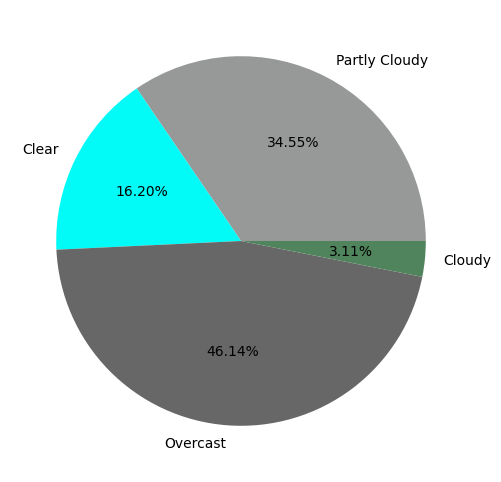

In [27]:
labels = ['Partly Cloudy', 'Clear', 'Overcast', 'Cloudy']
values = [partly_cloudy, clear, overcast, cloudy]
colors = ['#969998', '#02FBF7', '#676767', '#50845C']

plt.figure(figsize = (10, 6))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

**6) Atmospheric Pressure**

<Axes: xlabel='Season', ylabel='Atmospheric Pressure'>

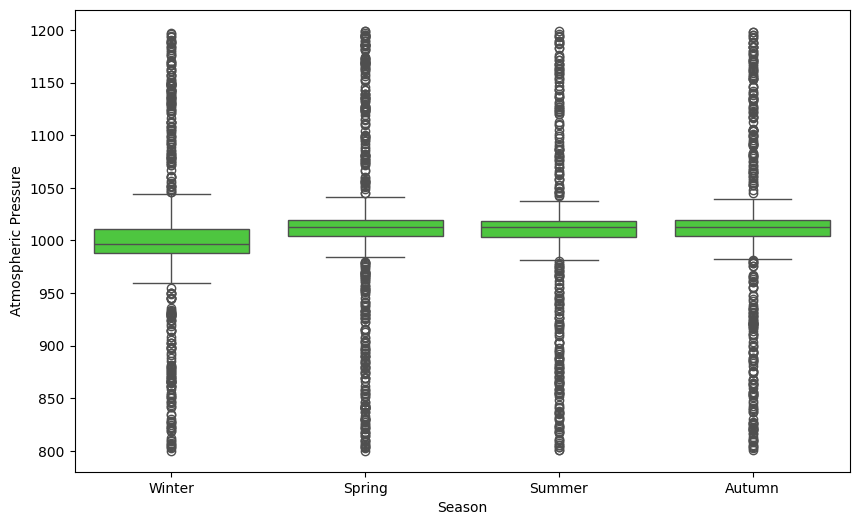

In [28]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Season', y = 'Atmospheric Pressure', color = '#3CDD29')

Atmospheric Pressure is the lowest in winter. In other seasons, it has the same behaviour.

<Axes: xlabel='Precipitation (%)', ylabel='Atmospheric Pressure'>

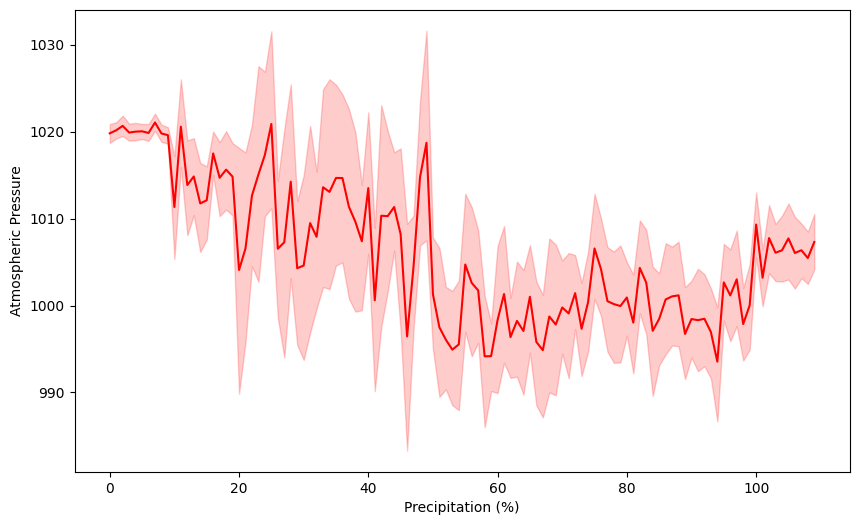

In [29]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Precipitation (%)', y = 'Atmospheric Pressure', color = 'red')

**7) UV Index**

<Axes: xlabel='Season', ylabel='UV Index'>

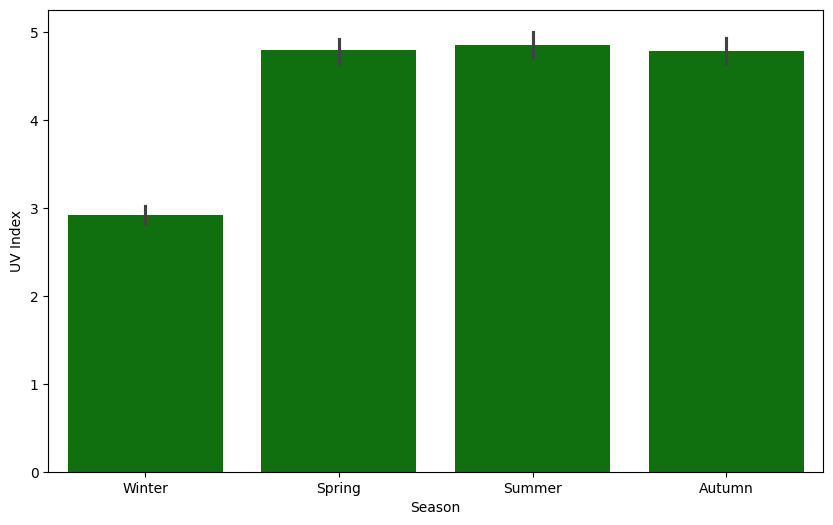

In [30]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'Season', y = 'UV Index', color = 'g')

UV index is lower in winter.

<Axes: xlabel='Cloud Cover', ylabel='UV Index'>

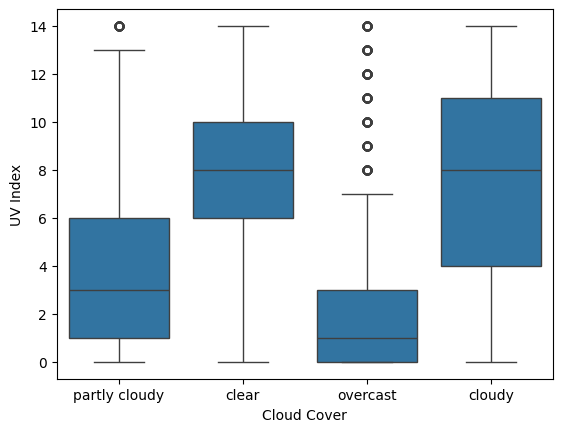

In [31]:
sns.boxplot(data = df, x = 'Cloud Cover', y = 'UV Index')

As expected, UV index is the lowest in overcast weather despite some expectations. On the other hand, UV is maximum in clear weather.

**8) Season**

In [32]:
winter = df['Season'].value_counts()['Winter']
spring = df['Season'].value_counts()['Spring']
autumn = df['Season'].value_counts()['Autumn']
summer = df['Season'].value_counts()['Summer']

([<matplotlib.patches.Wedge at 0x78064ec15b70>,
 [Text(0.25678986018396527, 1.0696069220544058, 'Winter'),
  Text(-1.08812293896696, -0.16120939703970527, 'Spring'),
  Text(-0.22972695475611857, -1.0757441732393815, 'Autumn'),
  Text(0.9121365389736106, -0.614822685226597, 'Summer')],
 [Text(0.14006719646398105, 0.5834219574842212, '42.50%'),
  Text(-0.5935216030728873, -0.08793239838529378, '19.68%'),
  Text(-0.12530561168515555, -0.5867695490396626, '18.94%'),
  Text(0.497529021258333, -0.33535782830541655, '18.88%')])

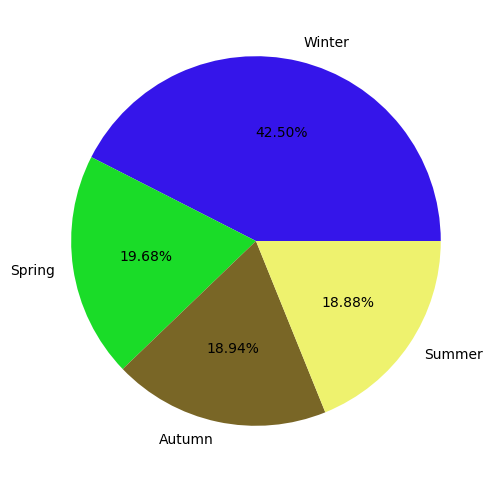

In [33]:
labels = ['Winter', 'Spring', 'Autumn', 'Summer']
values = [winter, spring, autumn, summer]
colors = ['#3515EA', '#1ADC28', '#796626', '#EEF26E']

plt.figure(figsize = (10, 6))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

**9) Visibility**

<Axes: xlabel='Humidity', ylabel='Visibility (km)'>

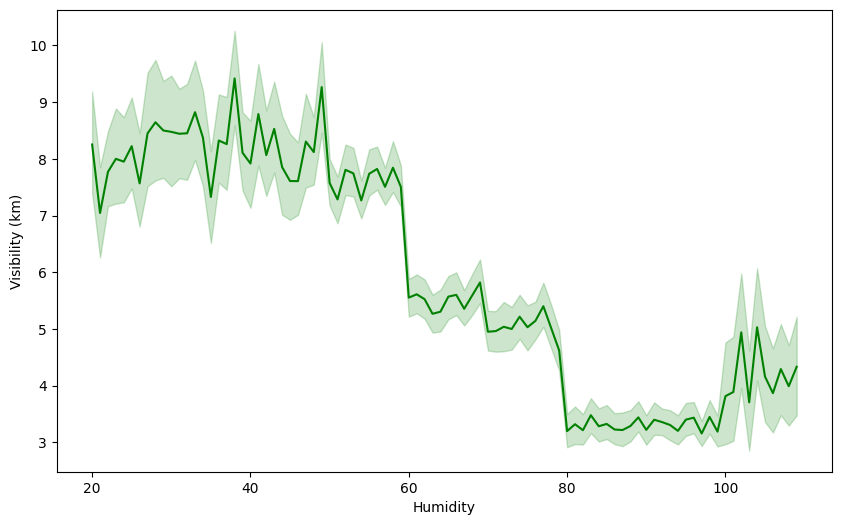

In [34]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Humidity', y = 'Visibility (km)', color = 'green')

There is an anti linear proportion between humidity and visibility

<Axes: xlabel='Precipitation (%)', ylabel='Visibility (km)'>

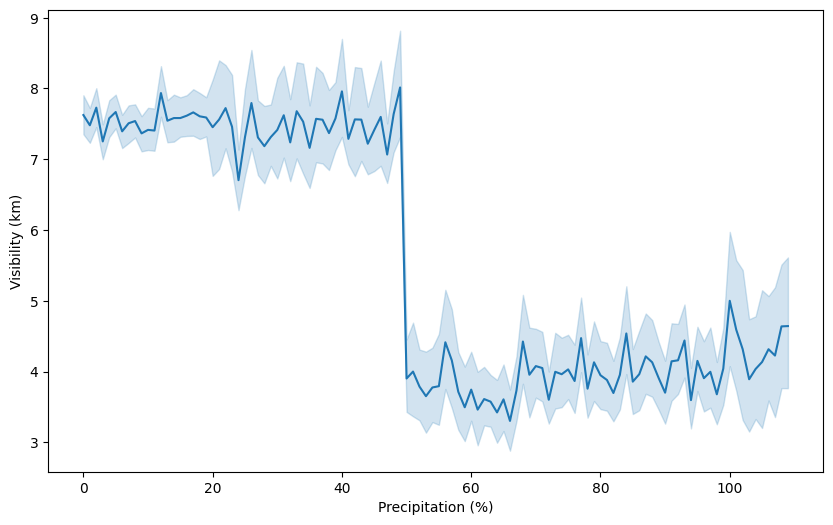

In [35]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Precipitation (%)', y = 'Visibility (km)')

There is also an anti linear proportion between precipitation and visibility

<Axes: xlabel='Season', ylabel='Visibility (km)'>

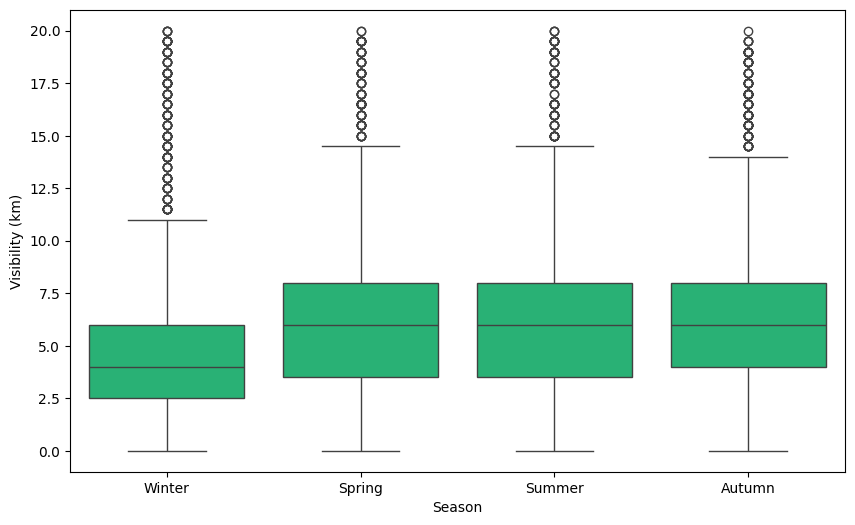

In [36]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Season', y = 'Visibility (km)', color = '#12C878')

Visibility is lower in winter

**10) Location**

In [37]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [38]:
inland = df['Location'].value_counts()['inland']
mountain = df['Location'].value_counts()['mountain']
coastal = df['Location'].value_counts()['coastal']

([<matplotlib.patches.Wedge at 0x78064ea4d7e0>,
 [Text(0.453142922320644, 1.0023280360993136, 'inland'),
  Text(-1.0520626904951118, -0.3211916799485736, 'mountain'),
  Text(0.726067520830291, -0.8263328356027946, 'coastal')],
 [Text(0.24716886672035127, 0.5467243833268983, '36.48%'),
  Text(-0.5738523766336973, -0.17519546179013104, '36.46%'),
  Text(0.39603682954379504, -0.4507270012378879, '27.05%')])

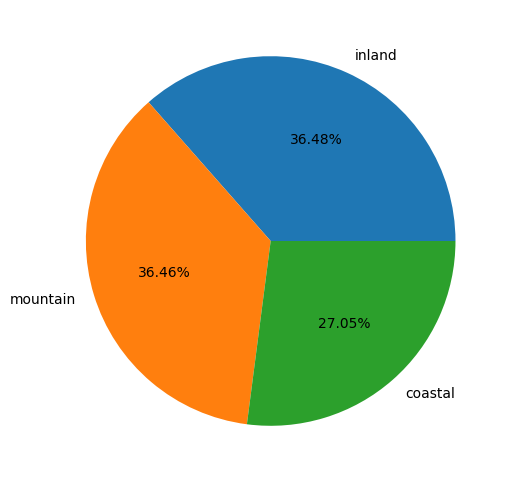

In [39]:
plt.figure(figsize = (10, 6))

values = [inland, mountain, coastal]
labels = ['inland', 'mountain', 'coastal']

plt.pie(values, labels = labels, autopct = '%1.2f%%')

**11) Weather Type**

In [40]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

<Axes: xlabel='Temperature', ylabel='Weather Type'>

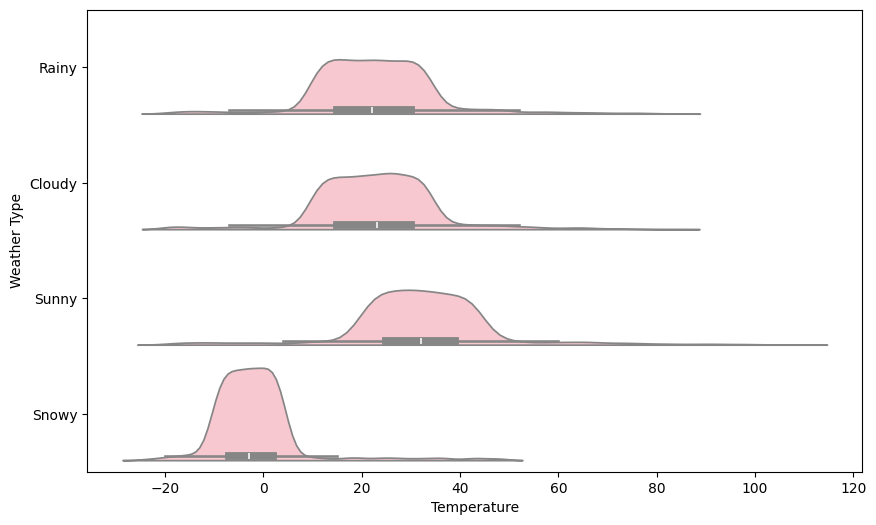

In [41]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df, x = 'Temperature', y = 'Weather Type', split = True, color = 'pink')

<Axes: xlabel='Weather Type', ylabel='Humidity'>

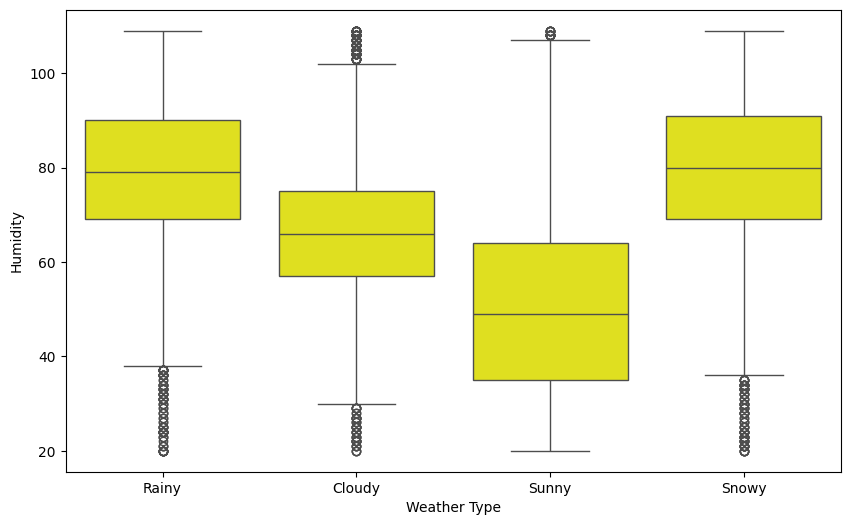

In [42]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Weather Type', y = 'Humidity', color = 'yellow')

# Correlation Analysis

Correlation coefficent has values between -1 and +1. +1 coefficent means there is an exact linear proportion between these features and -1 means there is an exact anti linear proportion. 0 coefficent means these features are not related to each other.

Due to these coefficent, we can understand which features affect each other.

Only numeric features can be used in correlation analysis so I have to ignore categorical datas.

In [43]:
numeric_columns = df.select_dtypes(include=np.number)
correlation = numeric_columns.corr()

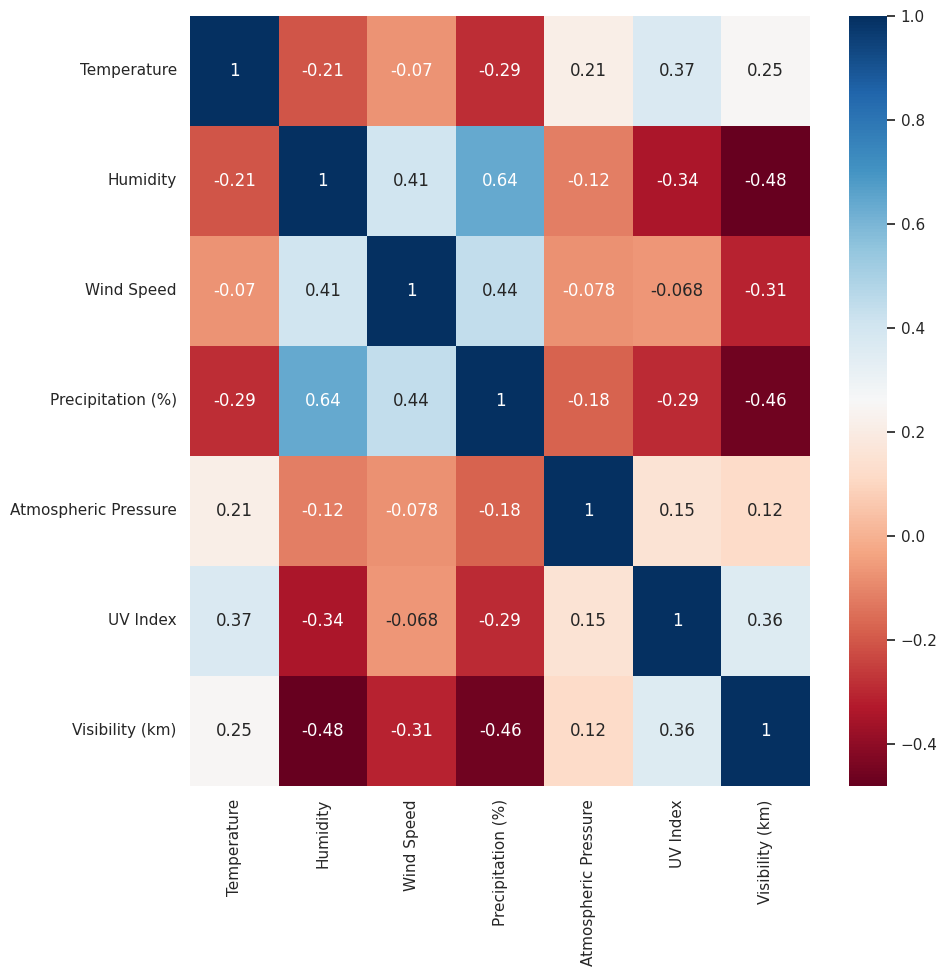

In [45]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(correlation, cmap="RdBu", annot=True)
plt.show()

# Outlier analysis

Outliers are not related to our main distribution. Thus they are able to manipulate the fitting in machine learning models that may gives us bad scores. Consequently we have to manipulate these outliers.

Deleting or replacing are both a solution for manipualting outliers. However sometimes deleting data can be dangerous in terms of considering the actual data especially in finance and health fields so I wanna replace the outliers for a column.

In [46]:
q3 = np.percentile(df['Temperature'], 75)
q1 = np.percentile(df['Temperature'], 25)

iqr = q3 - q1

upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

In [56]:
temp_outlier = []
outlier_num = 0

for i in df['Temperature']:
  if i > upper_bound or i < lower_bound:
    temp_outlier.append(i)
    outlier_num += 1

print(f'Outlier num: {outlier_num}')

Outlier num: 92


There are 92 outlier values in temperature column. Let filter these outliers by replacing them with the mean of that column.

In [58]:
temp_mean = np.mean(df['Temperature'])

In [59]:
filtering_temp = []
for i in df['Temperature']:
  if i not in temp_outlier:
    filtering_temp.append(i)

<Axes: ylabel='Density'>

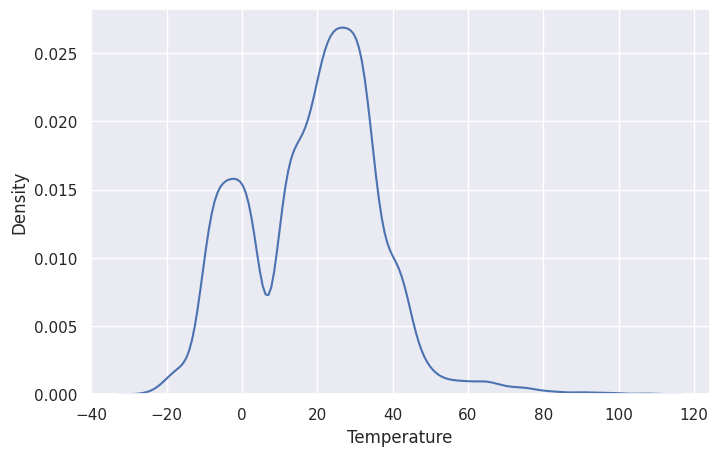

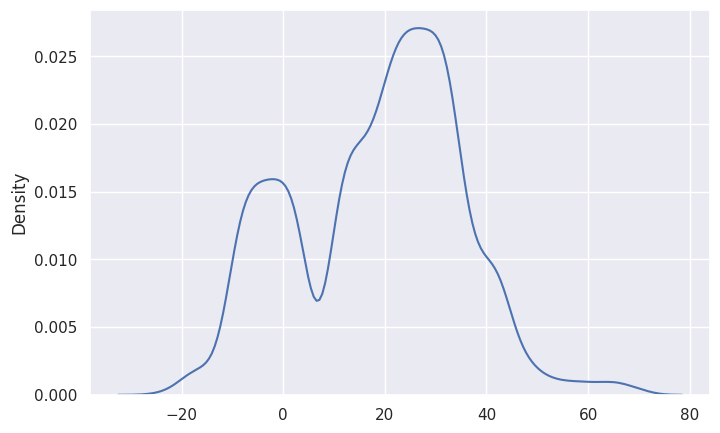

In [74]:
plt.figure(figsize = (8, 5))
sns.kdeplot(df['Temperature'])


plt.figure(figsize = (8, 5))
sns.kdeplot(filtering_temp)

First graph is the distribution of data before outlier analysis and second graph is after the outlier analysis.

Cleaned outlier can be seen from the intervals of x-axis